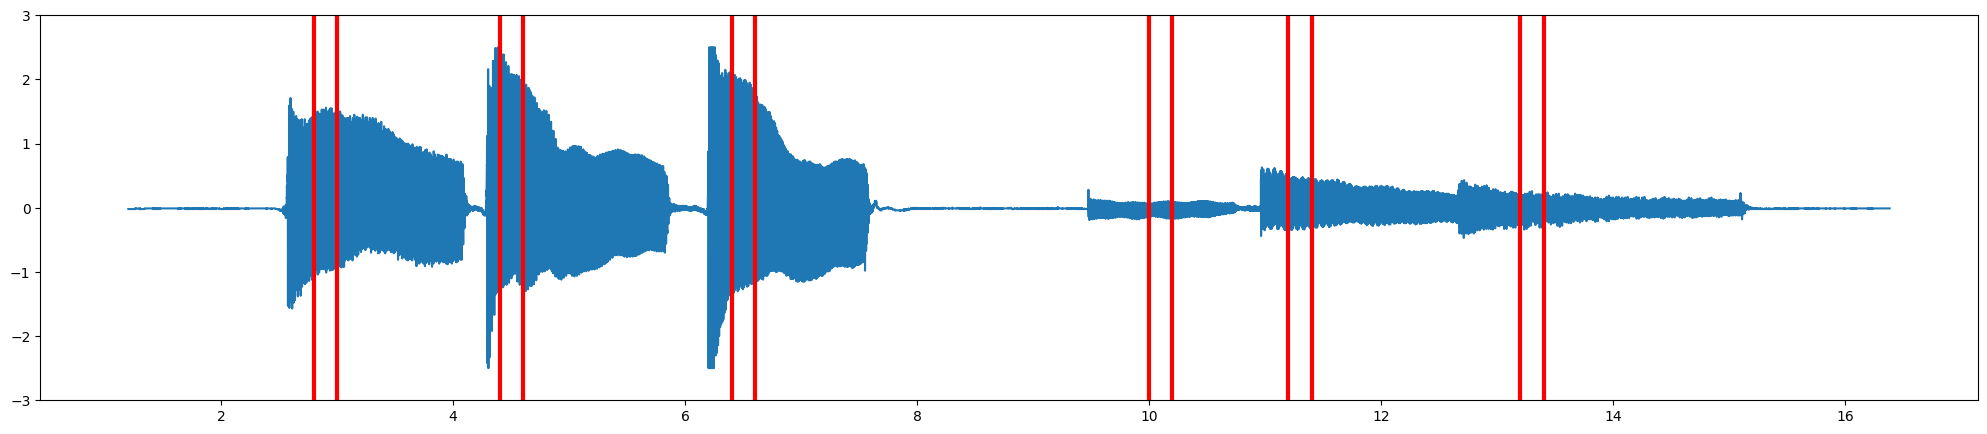

In [371]:
import matplotlib.pyplot as plt
import numpy as np

def choose_interval(data, s=0, e=-1):
    return data[s:e]

inter_start = 3000      # anything useful from 3000
inter_end = 40960       # max 52806 (-1)

file = open("data.txt", 'r')
data = {'x': list(), 'y': list()}
for i,line in enumerate(file):
    y = line.rstrip()
    data['y'].append(float(y))
    data['x'].append(i/2500)
    #data['x'].append(float(x)-1670007360.0)


X = np.array(choose_interval(data['x'], inter_start, inter_end))
y = np.array(choose_interval(data['y'], inter_start, inter_end)) - 2.5


fig = plt.figure(figsize=(25, 5), dpi=100)
plt.ylim(-3,3)
plt.plot(X,y)

plt.vlines(X[4000],-5,5,linestyles='solid',colors='r',linewidth=3)
plt.vlines(X[4500],-5,5,linestyles='solid',colors='r',linewidth=3)

plt.vlines(X[8000],-5,5,linestyles='solid',colors='r',linewidth=3)
plt.vlines(X[8500],-5,5,linestyles='solid',colors='r',linewidth=3)

plt.vlines(X[13000],-5,5,linestyles='solid',colors='r',linewidth=3)
plt.vlines(X[13500],-5,5,linestyles='solid',colors='r',linewidth=3)

plt.vlines(X[22000],-5,5,linestyles='solid',colors='r',linewidth=3)
plt.vlines(X[22500],-5,5,linestyles='solid',colors='r',linewidth=3)

plt.vlines(X[25000],-5,5,linestyles='solid',colors='r',linewidth=3)
plt.vlines(X[25500],-5,5,linestyles='solid',colors='r',linewidth=3)

plt.vlines(X[30000],-5,5,linestyles='solid',colors='r',linewidth=3)
plt.vlines(X[30500],-5,5,linestyles='solid',colors='r',linewidth=3)
 
plt.show()

In [372]:
Xslice = X[4000:4500]
yslice = y[4000:4500]
Xslice -= Xslice[0]
#Xslice

In [373]:
Xslice2 = X[8000:8500]
yslice2 = y[8000:8500]
Xslice2 -= Xslice2[0]
#yslice2

In [374]:
Xslice3 = X[13000:13500]
yslice3 = y[13000:13500]
Xslice3 -= Xslice3[0]

In [375]:
Xslice4 = X[22000:22500]
yslice4 = y[22000:22500]
Xslice4 -= Xslice4[0]

In [376]:
Xslice5 = X[25000:25500]
yslice5 = y[25000:25500]
Xslice5 -= Xslice5[0]

In [377]:
Xslice6 = X[30000:30500]
yslice6 = y[30000:30500]
Xslice6 -= Xslice6[0]

In [365]:
def plot_stem(y,intrv=(0,len(y)),sr=2500):
    y = y[intrv[0]:intrv[1]]
    c = abs(np.fft.fft(y))
    n = len(y)
    #fr = abs(np.fft.fftfreq(len(y)))
    # print(f"samples:{n}")
    # c = c/n * 2
    freqs = np.linspace(0,sr,n)
    #freqs = np.array(range(0,n))
    #freqs = np.array(range(0,n))/4 # 0/4 1/4 2/4 ...

    fig = plt.figure(figsize=(25, 5), dpi=100)
    plt.stem(freqs, c)
    # plt.xticks(freqs[:20])
    i = np.argmax(c[:-n//2]) 
    print(max(c))
    print(i)
    #print(max(y))
    print(f"F:{i/n * sr}")
    print(freqs[i])
    #print(c)
    #print(freqs)
    

In [405]:
def plot_stem3(y, intrv=(0,len(y)), sr=2500, expected=82):
    c = abs(np.fft.fft(y))
    n = len(y)
    c = c/n * 2
    freqs = np.linspace(0,sr,n)
    #freqs = np.array(range(0,sr))/n*sr
    #freqs = np.array(range(0,n))/4 # 0/4 1/4 2/4 ...

    fig = plt.figure(figsize=(25, 5), dpi=100)
    plt.stem(freqs[intrv[0]:intrv[1]], c[intrv[0]:intrv[1]])
    plt.xticks(np.arange(0,2500,100))
    plt.show()
    
    ind = np.argpartition(c[1:-n//2], -10)[-10:]
    print(*sorted([round(indx/n * sr, 2) for indx in ind]))
    print(expected,'\n\n\n')
    # i = np.argmax(c[:-n//2]) 
    # print(f"F:{i/n * sr} i:{i}\n\n\n")
    # print(freqs[i], "\n\n\n\n")
    # TODO filtry - szumy


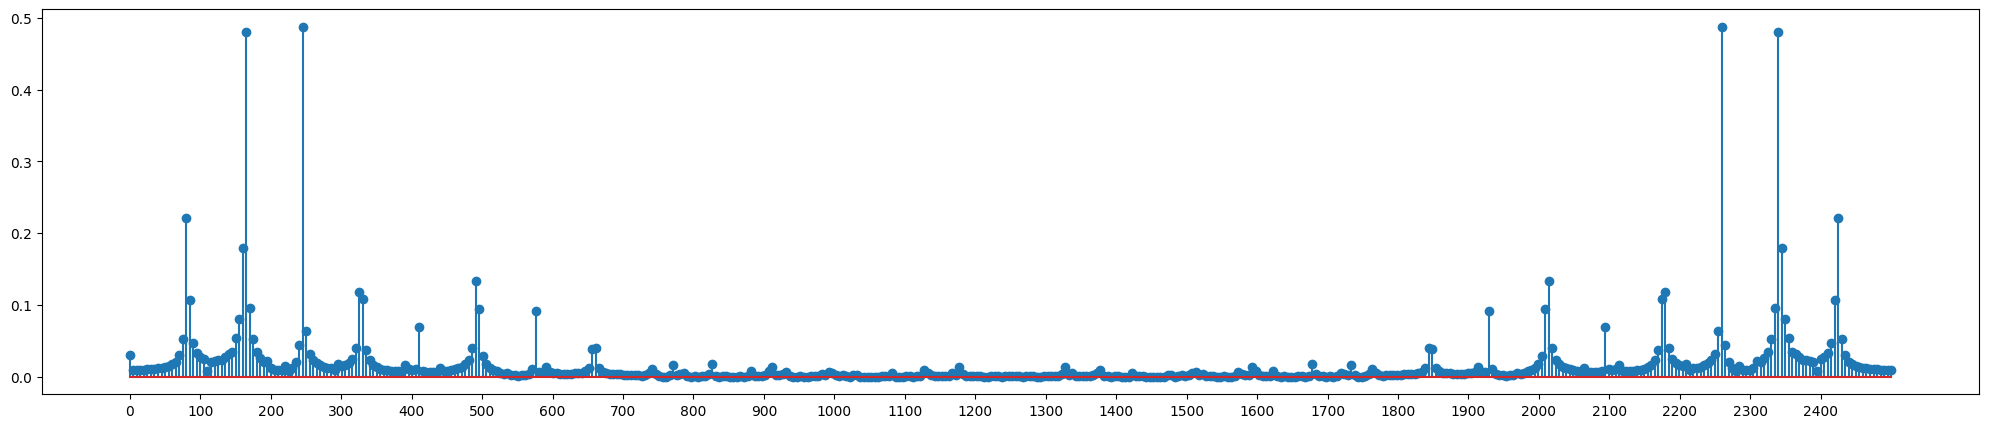

75.0 80.0 155.0 160.0 165.0 240.0 320.0 325.0 485.0 490.0
82 





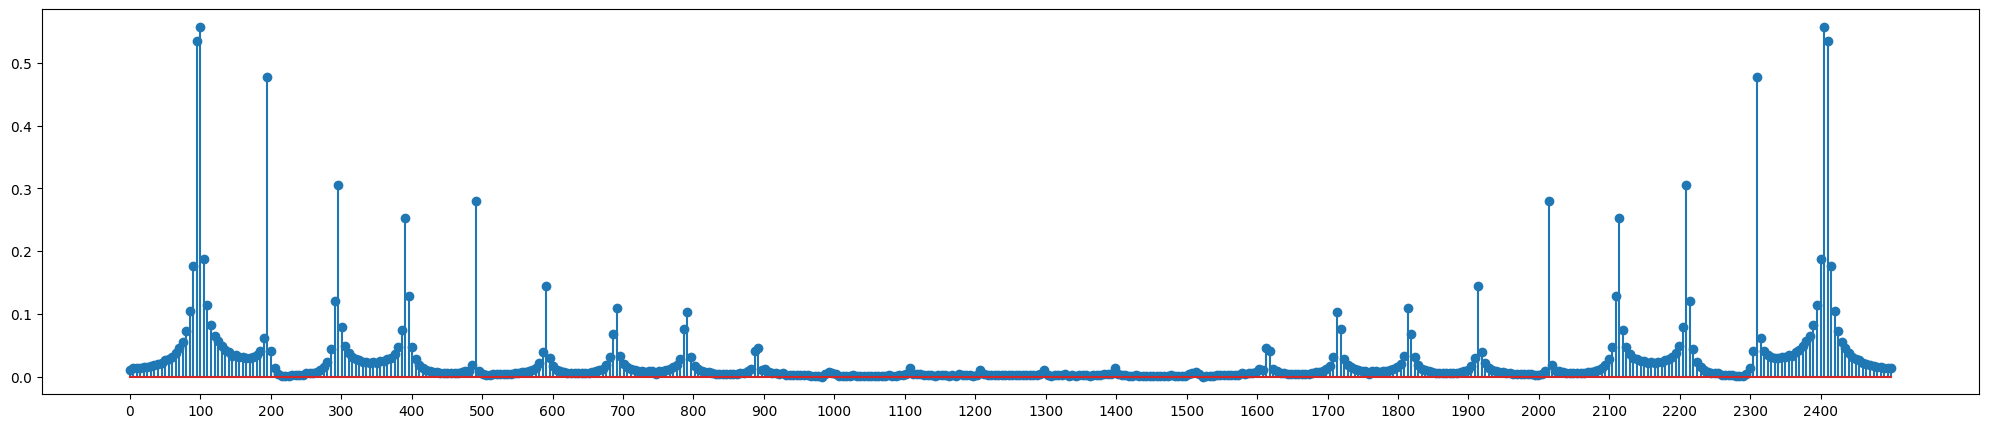

85.0 90.0 95.0 100.0 190.0 290.0 385.0 390.0 485.0 585.0
98 





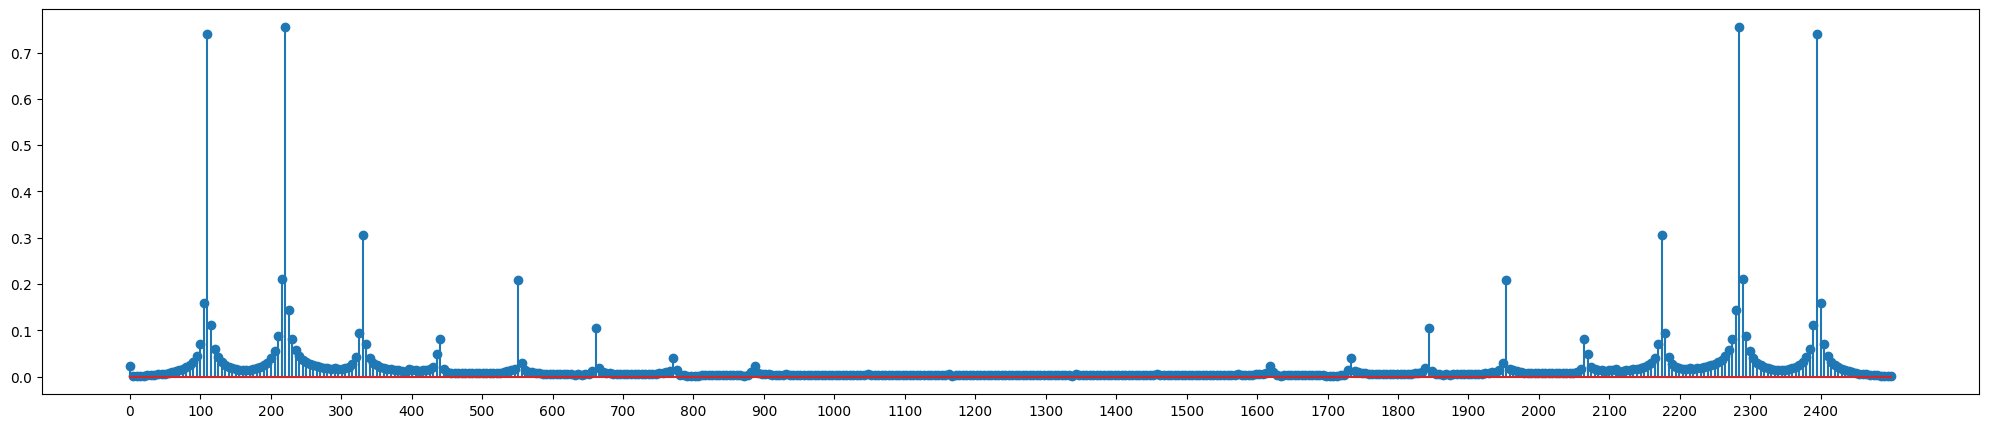

100.0 105.0 110.0 210.0 215.0 220.0 320.0 325.0 545.0 655.0
110 





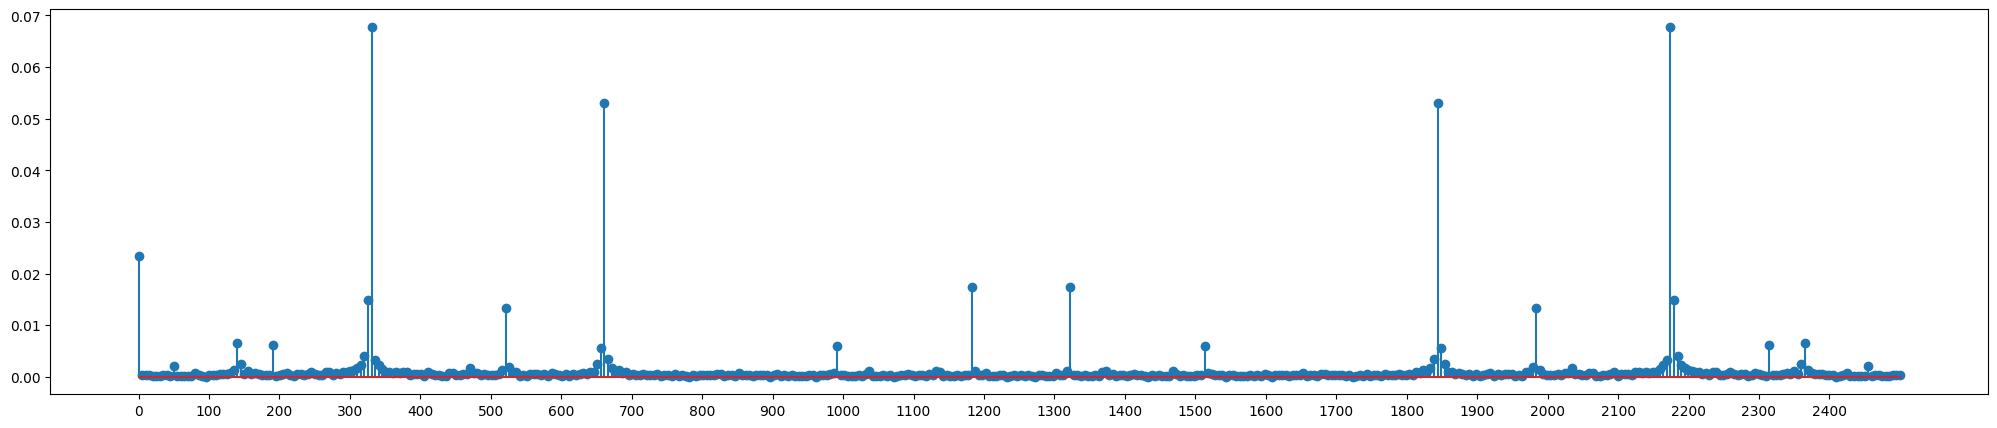

135.0 185.0 315.0 320.0 325.0 515.0 650.0 655.0 985.0 1175.0
330 





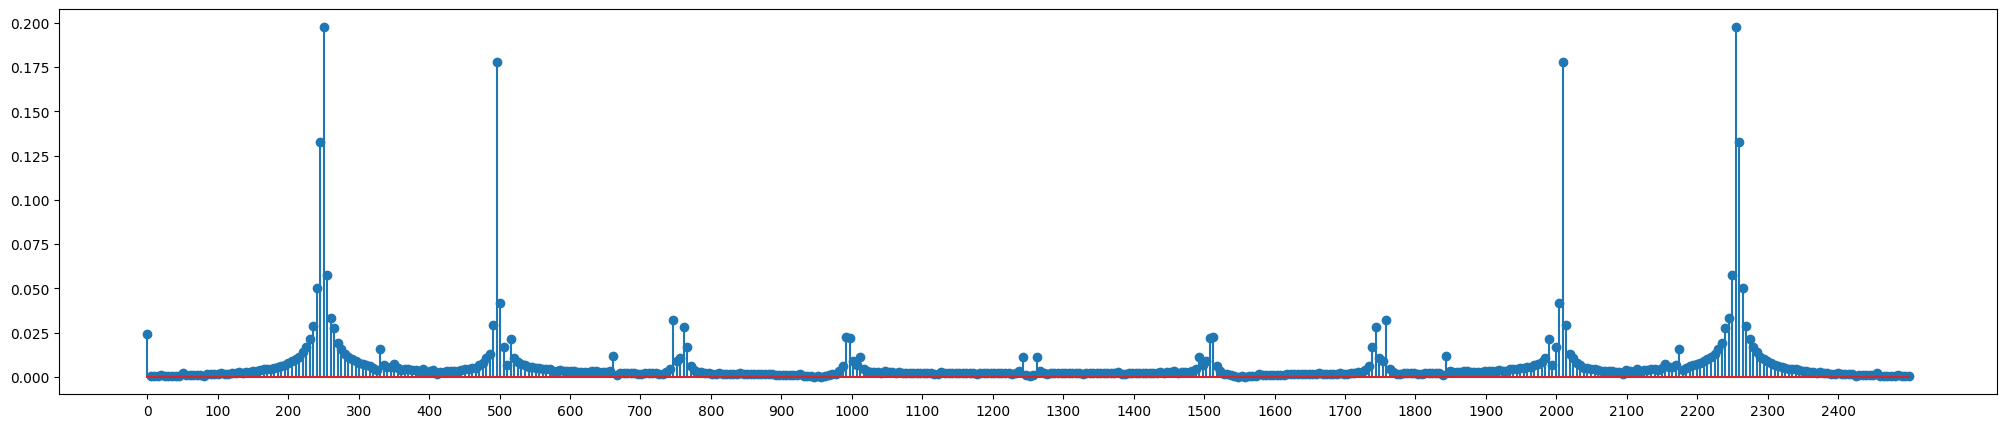

230.0 235.0 240.0 245.0 250.0 255.0 485.0 490.0 495.0 740.0
247 





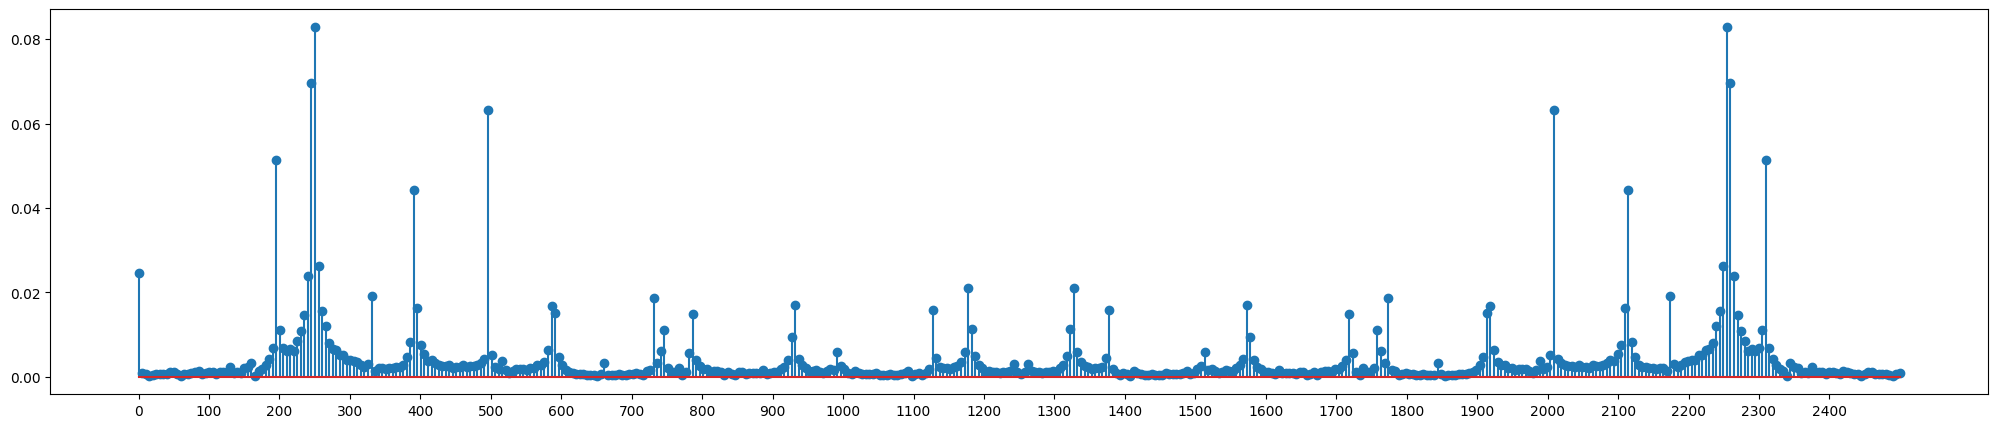

190.0 235.0 240.0 245.0 250.0 325.0 385.0 490.0 725.0 1170.0
196 





In [408]:
plot_stem3(yslice, expected=82) # 82 HZ
plot_stem3(yslice2, expected=98) # 98 HZ
plot_stem3(yslice3, expected=110) # 110 HZ
plot_stem3(yslice4, expected=330) # 330 HZ
plot_stem3(yslice5, expected=247) # 247 HZ
plot_stem3(yslice6, expected=196) # 196 HZ

In [242]:
def plot_stem2(x):
    c = np.fft.fft(x)
    n = len(c)
    fr = np.array(range(0,n))/4 # 0/4 1/4 2/4 ...
    condition = (fr < 600)# & (fr > 100)
    yy = np.abs(c[condition])
    xx = fr[condition]

    a = np.argmax(yy)
    f = xx[a]
    plt.plot(xx,yy)
    plt.axvline(x=f,color='r')
    plt.show()
    print(f"{f} Hz\n\n\n\n")

#plot_stem2(yslice)

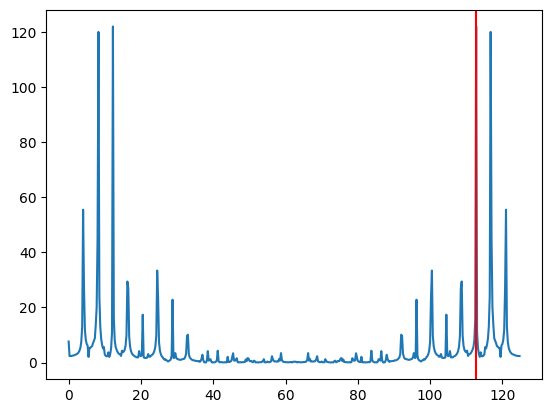

112.75 Hz






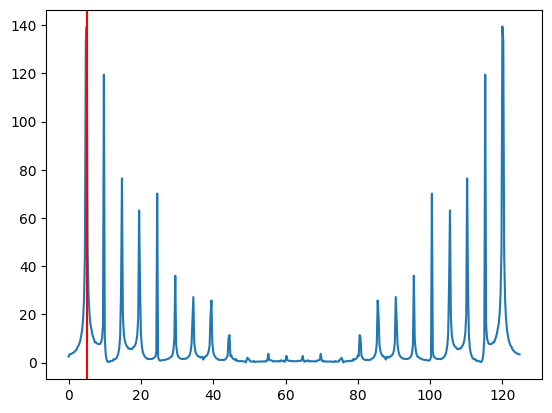

5.0 Hz






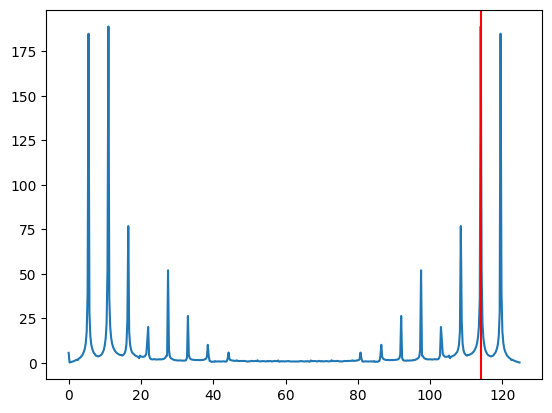

114.0 Hz






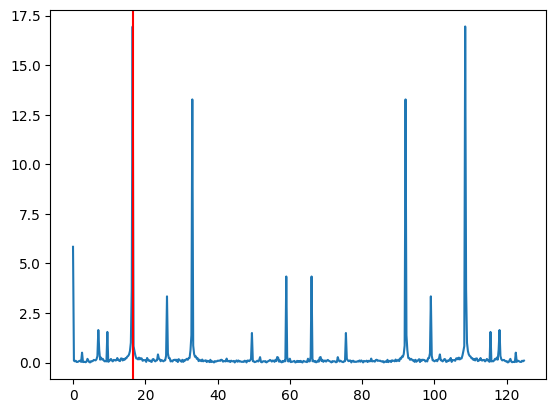

16.5 Hz






In [388]:
plot_stem2(yslice) # ok
plot_stem2(yslice2) 
plot_stem2(yslice3) 
plot_stem2(yslice4) 

In [ ]:
# .wav -> 33968 sampli
# data.txt plik - kazdy dzwiek ~ 1000 sampli